In [1]:
import pandas as pd

df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [7]:
X = df[['calory', 'breakfast', 'lunch', 'dinner','exercise']]
Y = df[['body_shape']]

In [36]:
print(X.mean())
print()
print(X.std())

calory       2780.0
breakfast       1.0
lunch           1.2
dinner          0.9
exercise        1.0
dtype: float64

calory       1231.800850
breakfast       0.816497
lunch           0.918937
dinner          0.737865
exercise        1.054093
dtype: float64


In [32]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
x_std

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [20]:
print(x_std.mean())
print(x_std.std())
x_std.T
    # 표준화가 잘 되었음을 확인 가능!!

3.552713678800501e-17
1.0


array([[-1.35205803,  0.01711466,  0.61612771, -1.18091145,  1.89972711,
        -1.26648474,  0.18826125,  1.04399418, -0.15403193,  0.18826125],
       [ 0.        ,  0.        ,  1.29099445, -1.29099445,  1.29099445,
        -1.29099445,  0.        ,  1.29099445, -1.29099445,  0.        ],
       [-1.3764944 , -0.22941573,  0.91766294, -0.22941573,  0.91766294,
        -1.3764944 , -1.3764944 ,  0.91766294,  0.91766294,  0.91766294],
       [-1.28571429,  0.14285714,  0.14285714, -1.28571429,  1.57142857,
         0.14285714,  0.14285714,  1.57142857, -1.28571429,  0.14285714],
       [ 1.        ,  0.        , -1.        ,  2.        , -1.        ,
         1.        ,  0.        , -1.        , -1.        ,  0.        ]])

In [15]:
import numpy as np

features = x_std.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [16]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvales \n%s' %eig_vals)
print('Eigenvectors \n%s' %eig_vecs)

Eigenvales 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]
Eigenvectors 
[[ 0.508005    0.0169937  -0.84711404  0.11637853  0.10244985]
 [ 0.44660335  0.36890361  0.12808055 -0.63112016 -0.49973822]
 [ 0.38377913 -0.70804084  0.20681005 -0.40305226  0.38232213]
 [ 0.42845209  0.53194699  0.3694462   0.22228235  0.58954327]
 [-0.46002038  0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [21]:
projected_X = x_std.dot(eig_vecs.T[0])
projected_X

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

In [23]:
result = pd.DataFrame(projected_X, columns = ['PC1'])
result['y-axis'] = 0.0
result['label'] = Y
result.head()

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat


Text(0.5, 1.0, 'PCA result')

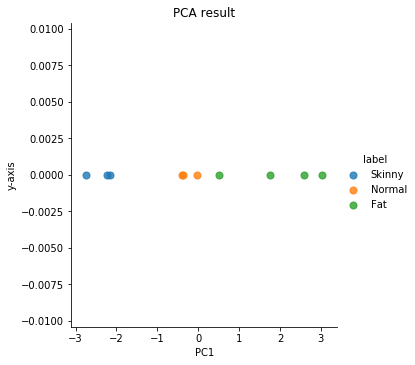

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot('PC1', 'y-axis', data = result, fit_reg = False,
           scatter_kws = {"s":50},
           hue = 'label')

plt.title('PCA result')